# Face Reconstruction using PCA

This notebook demonstrates how to reconstruct faces from the Yale Faces dataset using Principal Component Analysis (PCA). PCA is a statistical technique used to emphasize variation and capture strong patterns in a dataset. This notebook uses PCA to reconstruct faces by projecting the data onto principal components and creating a video to show the reconstruction process for a randomly selected image.

## Setup

We do the preliminary setup by importing the required libraries

In [53]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import random

## Preparing the Data

To begin the PCA process, we need to prepare our data. This involves reading the image files from the `yalefaces` directory and excluding any irrelevant files, such as `.DS_Store`, which may be created by the operating system.

In [54]:
# Read files and exclude .DS_Store
files = [file for file in os.listdir('yalefaces') if file != ".DS_Store"]

Next, we use these files to create a data matrix. Each image is resized to 40x40 pixels and flattened into a one-dimensional array. This step ensures that all images have the same dimensions, making them suitable for analysis.

In [55]:
# Create a data matrix by processing each image file
dmatrix = np.array([np.array(Image.open(os.path.join('yalefaces', file)).resize((40, 40))).ravel() for file in files])

Once we have our data matrix, we need to standardize it since we want each feature to contribute equally to the analysis, crucial for PCA.

In [56]:
# Standardize the data matrix
dmatrix_st = (dmatrix - np.mean(dmatrix, axis=0)) / np.std(dmatrix, axis=0)


Once we have our standardized data matrix we can proceed with performing PCA

## Performing PCA

In order to perform PCA, it is first important to perform Singular Value Decomposition (SVD) to decompose the standardized data matrix into three component matrices, essential for identifying the directions (principal components) that capture the maximum variance in the data.


In [57]:
# Perform SVD
u, s, vt = np.linalg.svd(dmatrix_st)

After obtaining the principal components, we project the standardized data onto the first two principal components. This allows us to visualize the data distribution in a reduced dimensional space, making it easier to understand the underlying structure of the data.

The matrix `vt` contains the principal components of our data. We select the first two principal components because they capture the most variance.

In [58]:
# Select the first two principal components from the Vt matrix
w = vt[:2, :]

Next, we project the standardized data matrix onto these two principal components. This is done by calculating the dot product of the standardized data matrix and the transpose of the selected principal components. We take the real part of the result to ensure that it is purely real.

In [59]:
# Project the standardized data onto the first two principal components and take the real part
z = np.real(np.dot(dmatrix_st, w.T))

Finally, we create a scatter plot to visualize the data distribution in the reduced dimensional space defined by the first two principal components.

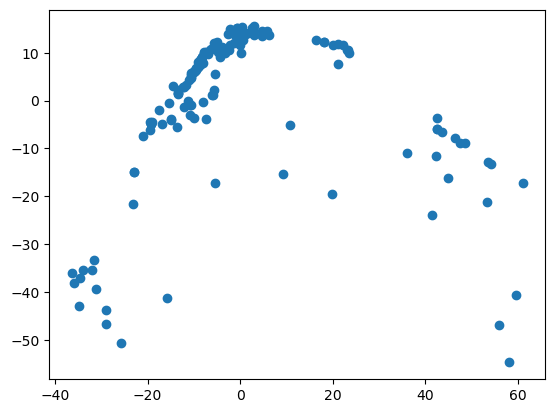

In [60]:
# Create a scatter plot of the projected data on the first two principal components
plt.scatter(z[:, 0], z[:, 1])

# Display the plot
plt.show()

Now for the fun part. With the principal components identified, we move on to reconstructing a randomly selected image using PCA and creating a video to show the reconstruction process step-by-step.

## Reconstructing the Image and Creating the Video

First, we randomly select an image file to be reconstructed from the `yalefaces` directory and center the flattened image by subtracting the mean of the data matrix. This step is necessary to align the image with the principal components calculated from the entire dataset.

In [61]:
# Select a random subject image file and center the flattened image by subtracting the mean of the data matrix
centered_image = np.array(Image.open(os.path.join('yalefaces', random.choice(files))).resize((40, 40))).ravel().reshape(1, -1) - np.mean(dmatrix, axis=0)

We then generate frames by projecting the centered image onto an increasing number of principal components and reconstructing the image at each step. This shows how the image reconstruction improves as more principal components are used.

In [62]:
# Generate frames by projecting onto an increasing number of principal components
frames = [np.uint8((np.dot((centered_image @ vt[:k, :].T), vt[:k, :]) + np.mean(dmatrix, axis=0)).reshape((40, 40))) for k in range(1, len(vt) + 1)]

We then use these frames to begin creating the video which starts with initializing the video writer object. We use the MJPG codec at 200 fps, and specify the filename and frame size for the output video. The MJPG codec is chosen for its wide compatibility and efficient compression for image sequences, while 200 fps is selected to provide a smooth and quick reconstruction video.

In [63]:
# Initialize the video writer object with MJPG codec at 200 fps, given filename and frame size
out_vid = cv2.VideoWriter('reconstruction.avi', cv2.VideoWriter_fourcc(*'MJPG'), 200.0, (40, 40))

Next, we convert each frame to BGR, the correct color format and write it to the video. Finally we release the video writer object to finalize the output video file ensuring proper writing of frames and saving of video file

In [64]:
# Convert each frame to BGR format and write it to the video to ensure correct color format of video
[out_vid.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)) for frame in frames]
out_vid.release()

A video labelled reconstruction.avi should be available for viewing at root

# Contact

**Prepared by:** Farzan Mirza

**Email:** [farzanmrz@gmail.com](mailto:farzanmrz@gmail.com), [fm474@drexel.edu](mailto:fm474@drexel.edu)

**GitHub:** [https://github.com/Farzanmrz](https://github.com/Farzanmrz)

**LinkedIn:** [https://www.linkedin.com/in/farzan-mirza13/](https://www.linkedin.com/in/farzan-mirza13/)